# Experiments with GalSim, Part 2

This Julia notebook uses several files generated by running the `galsim.ipynb` Python notebook. So run this one after running that one.

In [1]:
Pkg.status("Celeste")

 - Celeste                       0.4.0+             jcr/galsim (dirty)


In [2]:
import Celeste: AccuracyBenchmark, ParallelRun, GalsimBenchmark, Config, Model
using DataFrames
import PyPlot

## Running Celeste.jl on the same data as SExtractor

In [3]:
extensions = AccuracyBenchmark.read_fits("three_sources_two_overlap.fits");

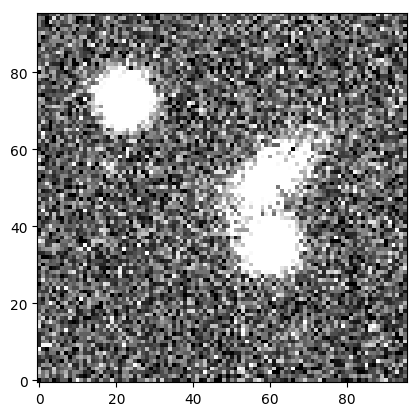

In [4]:
data = extensions[2].pixels'
m, s = mean(data), std(data)
PyPlot.imshow(data, interpolation="nearest", cmap="gray", vmin=m-s, vmax=m+s, origin="lower");

In [5]:
header = extensions[1].header
this_test_case_name = header["CLDESCR"]
num_sources = header["CLNSRC"]
images = AccuracyBenchmark.make_images(extensions)
truth_catalog_df = GalsimBenchmark.extract_catalog_from_header(header)
catalog_entries = AccuracyBenchmark.make_initialization_catalog(truth_catalog_df, false)
target_sources = collect(1:num_sources)
config = Config(min_radius_pix = 40.0)
patches = Model.get_sky_patches(images, catalog_entries)
neighbor_map = Dict(i=>Model.find_neighbors(patches, i) for i in target_sources);

In [6]:
results = ParallelRun.one_node_joint_infer(catalog_entries,
                                           patches,
                                           target_sources,
                                           neighbor_map,
                                           images,
                                           config=config)
prediction_df = AccuracyBenchmark.celeste_to_df(results)

[1]<1> INFO: Optimizing 3 sources
[1]<1> INFO: Done assigning sources to threads for processing
[1]<1> INFO: Processing with dynamic connected components load balancing
[1]<1> INFO: Batch 1 - [60.0131]
[1]<1> INFO: Batch 1 avg threads idle: 0% (0.0 / 60.013057423)
[1]<1> INFO: Batch 1 - [10.8018]
[1]<1> INFO: Batch 1 avg threads idle: 0% (0.0 / 10.801802773)
[1]<1> INFO: Batch 1 - [10.1923]
[1]<1> INFO: Batch 1 avg threads idle: 0% (0.0 / 10.192287)
[1]<1> INFO: Total idle time: 0, Total sum of threads times: 81
[1]<1> INFO: 16:47:32.836: (active,inactive) pixels processed: (1378555,891670)


,ra,dec,is_star,gal_frac_dev,gal_axis_ratio,gal_radius_px,gal_angle_deg,flux_r_nmgy,color_ug,color_gr,color_ri,color_iz,log_flux_r_stderr,color_ug_stderr,color_gr_stderr,color_ri_stderr,color_iz_stderr
1,0.00393384,0.00671389,0.994853,0.0289662,0.0782954,0.123517,8.70464,9.95085,1.37729,0.644276,0.273179,0.125795,0.0100095,0.0443276,0.0154791,0.0100241,0.0102635
2,0.00584556,0.00671389,0.00500024,0.0102764,0.229981,3.78745,36.5407,9.87445,0.265136,0.674906,0.346816,0.24966,0.0100044,0.0256083,0.0162618,0.0100084,0.0100292
3,0.00811527,0.00254722,0.992062,0.671155,0.165749,0.204615,148.012,10.12,1.40646,0.637584,0.263393,0.157718,0.0100074,0.0442736,0.0152205,0.0100162,0.0100638


## Comparision to  Hyper Suprime-Cam (HSC) software pipeline

"The single biggest failure mode of the deblender occurs when three or more peaks in a blend appear in a straight
line"

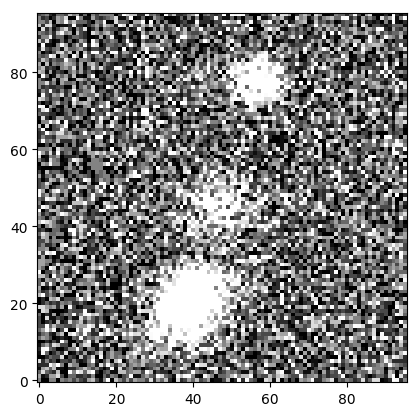

In [7]:
extensions = AccuracyBenchmark.read_fits("three_sources_in_a_row.fits");
data = extensions[2].pixels'
m, s = mean(data), std(data)
PyPlot.imshow(data, interpolation="nearest", cmap="gray", vmin=m-s, vmax=m+s, origin="lower");

In [8]:
header = extensions[1].header
this_test_case_name = header["CLDESCR"]
num_sources = header["CLNSRC"]
images = AccuracyBenchmark.make_images(extensions)
truth_catalog_df = GalsimBenchmark.extract_catalog_from_header(header)
catalog_entries = AccuracyBenchmark.make_initialization_catalog(truth_catalog_df, false)
target_sources = collect(1:num_sources)
config = Config(min_radius_pix = 40.0)
patches = Model.get_sky_patches(images, catalog_entries)
neighbor_map = Dict(i=>Model.find_neighbors(patches, i) for i in target_sources);

In [9]:
results = ParallelRun.one_node_joint_infer(catalog_entries,
                                           patches,
                                           target_sources,
                                           neighbor_map,
                                           images,
                                           config=config)
prediction_df = AccuracyBenchmark.celeste_to_df(results)

[1]<1> INFO: Optimizing 3 sources
[1]<1> INFO: Done assigning sources to threads for processing
[1]<1> INFO: Processing with dynamic connected components load balancing
[1]<1> INFO: Batch 1 - [38.2697]
[1]<1> INFO: Batch 1 avg threads idle: 0% (0.0 / 38.269722026)
[1]<1> INFO: Batch 1 - [11.1801]
[1]<1> INFO: Batch 1 avg threads idle: 0% (0.0 / 11.180149435)
[1]<1> INFO: Batch 1 - [12.1704]
[1]<1> INFO: Batch 1 avg threads idle: 0% (0.0 / 12.170381386)
[1]<1> INFO: Total idle time: 0, Total sum of threads times: 62
[1]<1> INFO: 16:48:35.687: (active,inactive) pixels processed: (1471605,825345)


,ra,dec,is_star,gal_frac_dev,gal_axis_ratio,gal_radius_px,gal_angle_deg,flux_r_nmgy,color_ug,color_gr,color_ri,color_iz,log_flux_r_stderr,color_ug_stderr,color_gr_stderr,color_ri_stderr,color_iz_stderr
1,0.00226915,0.00440831,0.00500039,0.0100294,0.416998,3.58399,44.2872,9.97671,0.220225,0.689756,0.334013,0.223815,0.0100039,0.0235927,0.0152779,0.0100082,0.0100374
2,0.00501222,0.00524166,0.00500076,0.010019,0.455342,3.60303,177.986,2.90941,0.117245,0.74513,0.391445,0.190926,0.0129161,0.0602743,0.040276,0.0147086,0.0195123
3,0.00865808,0.00632499,0.991495,0.873105,0.0386113,0.100173,169.008,3.01305,1.39307,0.660904,0.259827,0.163077,0.011577,0.101936,0.0313039,0.0131423,0.0175898
